<a href="https://colab.research.google.com/github/EstebanmAcero/Image_generation/blob/main/Kandinsky_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/ai-forever/diffusers.git
!pip install transformers
!pip install accelerate

  Cloning https://github.com/ai-forever/diffusers.git to /tmp/pip-req-build-ifl7svla
  Running command git clone --filter=blob:none --quiet https://github.com/ai-forever/diffusers.git /tmp/pip-req-build-ifl7svla
  Resolved https://github.com/ai-forever/diffusers.git to commit 9c368c101c06aa2b77690a594c0119d2670d6703
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.19.0.dev0-py3-none-any.whl size=1251184 sha256=5d894954344447d5c74cd7cf3a62314c6b6b86fe2362249f77361975be831094
  Stored in directory: /tmp/pip-ephem-wheel-cache-vt92x1hk/wheels/1e/76/3d/f2637ece4e8ae3f6f07a4eee8c13505ce927d1aedd919fad64
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.2 MB/s 

In [2]:
import sys
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import torch
import PIL
import torch
from diffusers.utils import load_image
from torchvision import transforms
from transformers import CLIPVisionModelWithProjection
from diffusers.models import UNet2DConditionModel
import numpy as np

DEVICE = torch.device('cuda:0')

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    'kandinsky-community/kandinsky-2-2-prior',
    subfolder='image_encoder'
).half().to(DEVICE)

unet = UNet2DConditionModel.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    subfolder='unet'
).half().to(DEVICE)

prior = KandinskyV22PriorPipeline.from_pretrained(
    'kandinsky-community/kandinsky-2-2-prior',
    image_encoder=image_encoder,
    torch_dtype=torch.float16
).to(DEVICE)

decoder = KandinskyV22Pipeline.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    unet=unet,
    torch_dtype=torch.float16
).to(DEVICE)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
torch.manual_seed(42)

negative_prior_prompt ='lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature'
img_emb = prior(
    prompt = input("Enter a description for the image: "),
    num_inference_steps=25,
    num_images_per_prompt=1
)

negative_emb = prior(
    prompt=negative_prior_prompt,
    num_inference_steps=25,
    num_images_per_prompt=1
)

images = decoder(
    image_embeds=img_emb.image_embeds,
    negative_image_embeds=negative_emb.image_embeds,
    num_inference_steps=75,
    height=512,
    width=512)

Enter a description for the image: Bluetooth 5.0 Tws Headphones


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature']


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

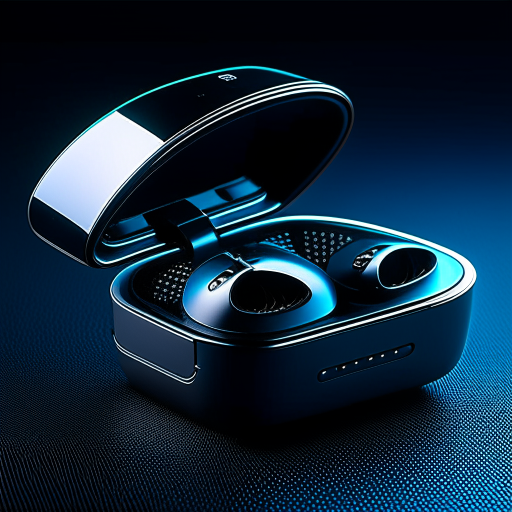

In [10]:
images.images[0]  # Run this to retrieve your generated image!